In [146]:
#Importing the tools to be used within this project
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [147]:
#importing the study case data
import pandas as dp
nonshown_data = dp.read_csv(r'C:\Users\coffe\Documents\DND\Project2\noshowappointments-kagglev2-may-2016.csv')
#Print out few lines to view and look for missing and useless data
nonshown_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [148]:
#Cleaning the Data
#choocing the unnecessary colums to delete
del_col=[ 'PatientId',  'AppointmentID', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism']

#deleting the columns
nonshown_data= nonshown_data.drop(del_col,1)

#previewing the new dataset
nonshown_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No


In [149]:
#Checking Data types
nonshown_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Handcap         110527 non-null  int64 
 6   SMS_received    110527 non-null  int64 
 7   No-show         110527 non-null  object
dtypes: int64(3), object(5)
memory usage: 6.7+ MB


In [150]:
#Checking the length of data set
len(nonshown_data)

110527

In [151]:
#Checking the null values in our data set
nonshown_data.isna().sum()


Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [152]:
# check if there is a dplicated  data 
print("Num of dublicated : ", + sum(nonshown_data.duplicated()))

Num of dublicated :  642


In [153]:
#Dropping duplicated data
nonshown_data.drop_duplicates(inplace=True)


In [154]:
# check if there is a dplicated  data after dropping to make sure there is no more duplicated data
print("Num of dublicated : ", + sum(nonshown_data.duplicated()))

Num of dublicated :  0


In [155]:
#printing to check if duplication deleted successfully 
print(nonshown_data.duplicated().sum())

0


In [156]:
#Exploring the dataset
# Find the sex distribution within the dataset
gndr_dstrb = nonshown_data['Gender'].value_counts().reset_index()
gndr_dstrb.columns = ['Gender' , '']
gndr_dstrb

,Gender,
0,F,71410
1,M,38475


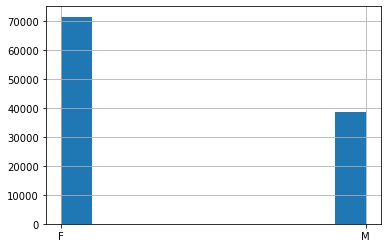

In [157]:
# plot distribution of Gender in this data set
nonshown_data['Gender'].hist();

In [158]:
# Statistics of received SMS
sms_rcvd = nonshown_data['SMS_received'].value_counts().reset_index()
sms_rcvd.columns = ['SMS_received' , '']
print(nonshown_data.SMS_received.mean() * 100)
sms_rcvd

32.29012149064931


,SMS_received,
0,0,74403
1,1,35482


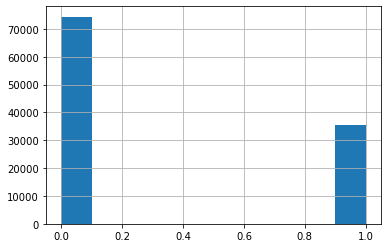

In [159]:
nonshown_data['SMS_received'].hist();

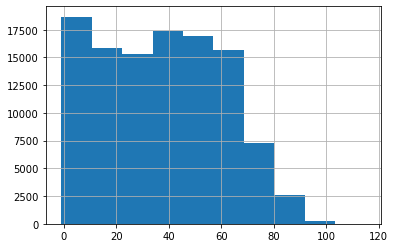

In [160]:
# plot distribution of Age in this data set
nonshown_data['Age'].hist();

In [161]:
#Average Age for the patients within the dataset
nonshown_data['Age'].mean()

37.08874732675069

In [162]:
#MAX age within the data set
print(nonshown_data['Age'].max())

115


In [163]:
#MIN age within the data set
print(nonshown_data['Age'].min())

-1


In [164]:
# view dimensions of dataset
nonshown_data.shape

(109885, 8)

In [165]:
#Analysing our Data
#Counting No-show 
nonshown_data['No-show'].value_counts()

No     87793
Yes    22092
Name: No-show, dtype: int64

In [166]:
#Splitting the patients acoording to attendance status into two groups to count percentage of absence
showed = nonshown_data['No-show'] == 'No'
not_showed = nonshown_data['No-show'] == 'Yes'
#Adding the new coulnms to our dataset
nonshown_data['showed'] = showed
nonshown_data['not_showed'] = not_showed
nonshown_data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Handcap,SMS_received,No-show,showed,not_showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,No,True,False
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No,True,False
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,No,True,False
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,No,True,False
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,No,True,False


In [167]:
#defining Percentage Function

#The percentage of patients who did  attended their appointments
#The percentage of patients who did not attended their appointments
def percentage(part,whole):
    return 100 * float(part) / float(whole)

showed =percentage (nonshown_data[nonshown_data['No-show']=='No'].shape[0], nonshown_data['No-show'].shape[0] )
showed


79.89534513354872

In [168]:
not_showed =percentage (nonshown_data[nonshown_data['No-show']=='Yes'].shape[0], nonshown_data['No-show'].shape[0] )
not_showed

20.10465486645129

In [169]:
#Male Patient who didnt showed up for their appoitnments
male_not_attended = percentage(nonshown_data[(nonshown_data['No-show']=='Yes') & (nonshown_data['Gender']=='M')].shape[0],nonshown_data[nonshown_data['Gender']=='M'].shape[0])
male_not_attended

19.864847303443796

In [170]:
#Male Patient who  showed up for their appoitnments
male_attended = percentage(nonshown_data[(nonshown_data['No-show']=='No') & (nonshown_data['Gender']=='M')].shape[0],nonshown_data[nonshown_data['Gender']=='M'].shape[0])
male_attended

80.1351526965562

In [171]:
#Female Patient who didnt showed up for their appoitnments
Fmale_not_attended = percentage(nonshown_data[(nonshown_data['No-show']=='Yes') & (nonshown_data['Gender']=='F')].shape[0],nonshown_data[nonshown_data['Gender']=='F'].shape[0])
Fmale_not_attended

20.23386080380899

In [172]:
#Female Patient who showed up for their appoitnments
Fmale_attended = percentage(nonshown_data[(nonshown_data['No-show']=='No') & (nonshown_data['Gender']=='F')].shape[0],nonshown_data[nonshown_data['Gender']=='F'].shape[0])
Fmale_attended

79.766139196191

In [173]:
#Percentage of people who did/didn treceived SMS and showed up 
rcvd_showed = nonshown_data.groupby('SMS_received')['showed'].mean() * 100
print(rcvd_showed)

SMS_received
0    83.457656
1    72.425455
Name: showed, dtype: float64


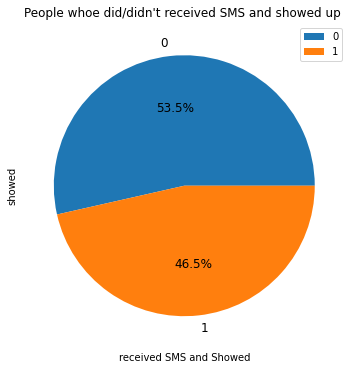

In [174]:
#Plotting the Percentage of people who received SMS and showed up and who didnt receive and showed up
plt.xlabel("received SMS and Showed")
plt.ylabel("didn't receive and showed up")
pltchart = rcvd_showed.plot.pie(figsize=(6,6), autopct='%1.1f%%', fontsize = 12);
plt.title("People whoe did/didn't received SMS and showed up ")
plt.legend()

In [175]:
#Percentage of people who did/didn treceived SMS and did'nt show up 
ntrcvd_ntshowed = nonshown_data.groupby('SMS_received')['not_showed'].mean() * 100
print(ntrcvd_ntshowed)

SMS_received
0    16.542344
1    27.574545
Name: not_showed, dtype: float64


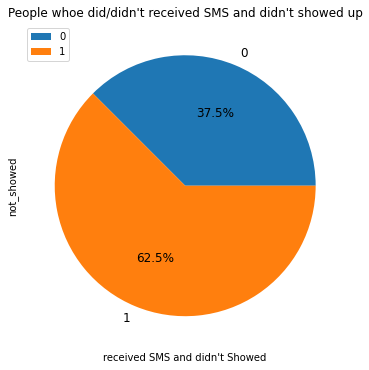

In [176]:
#Plotting the Percentage of people who received SMS and showed up and who didnt receive and didnt show up
plt.xlabel("received SMS and didn't Showed")
plt.ylabel("didnt receive and didn't showed up")
pltchart = ntrcvd_ntshowed.plot.pie(figsize=(6,6), autopct='%1.1f%%', fontsize = 12);
plt.title("Status" + ' (%) (Per appointment)\n', fontsize = 15 );
plt.title("People whoe did/didn't received SMS and didn't showed up")
plt.legend()

Gender
F    0.202339
M    0.198648
Name: not_showed, dtype: float64


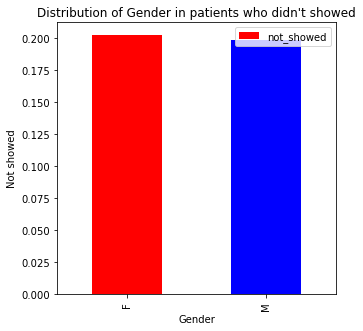

In [177]:
# using group by function to find relations between Gender and not attending the appontment
print(nonshown_data.groupby('Gender')['not_showed'].mean())
colors=['red' , 'blue']
nonshown_data.groupby('Gender')['not_showed'].mean().plot(kind='bar',figsize=(5,5) , color= colors );
plt.xlabel("Gender")
plt.ylabel("Not showed")
plt.title("Distribution of Gender in patients who didn't showed")
plt.legend()